# **Internship Task – TechHorizon**

**Student / Intern: Ameer Hamza**

**Email: hiameerhamza@gmail.com**

**Task 2:** Image Classification Using Pre-trained Models

For this task, we use two popular pre-trained deep learning models—MobileNetV2 and ResNet50—to classify images from a dataset stored on Google Drive. Both models are trained on ImageNet, which allows them to recognize a wide variety of objects. The goal is to classify general objects in images.

# **Step 1: Mount Google Drive and Set Dataset Path**

The dataset is stored in Google Drive, so we mount it to access the images:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step 2: Load Pre-trained Models**

We use two pre-trained models:



1.   MobileNetV2 (lightweight, efficient)
2.   ResNet50 (deeper network, generally higher accuracy)

In [ ]:
from tensorflow.keras.applications import MobileNetV2, ResNet50

model1 = MobileNetV2(weights="imagenet")
model2 = ResNet50(weights="imagenet")


Both bove models are trained on ImageNet, so we don’t need to train them from scratch.

# **Step 3: Image Preprocessing**

Each model requires images of size 224×224 pixels and preprocessed differently.
*   **load_img** resizes the image.
*   **img_to_array** converts it to a NumPy array.
*   **np.expand_dims** adds a batch dimension required by Keras models.









In [ ]:
from tensorflow.keras.preprocessing import image

def load_and_prep_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array


# **Step 4: Load Image Files**

We collect all image paths from the dataset folder. This allows us to iterate through images for prediction.

In [ ]:
import os
dataset_path = "/content/drive/MyDrive/Datasets/TechHorizonTask2Dataset"

image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


# **Step 5: Predictions Using Both Models**

We predict the top 3 classes for the first 10 images using both models.
*   MobileNetV2 uses preprocess_mnv2 for preprocessing.
*   ResNet50 uses preprocess_resnet.
*   decode_predictions converts numerical predictions into human-readable class labels with probabilities.

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mnv2, decode_predictions as decode_mnv2
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet, decode_predictions as decode_resnet
import numpy as np
for i, img_path in enumerate(image_files[5:15]): #first 10 samples for prediction by each models
    img, img_array = load_and_prep_img(img_path)

    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]

    preds2 = model2.predict(preprocess_resnet(img_array))
    decoded2 = decode_resnet(preds2, top=3)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


# **Step 6: Display Predictions**

We visualize the first 10 images along with predictions from both models.

*   Each image is shown twice, once for each model.
*   Top 3 predicted classes with confidence percentages are displayed.
*   This allows a side-by-side comparison of both models’ performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


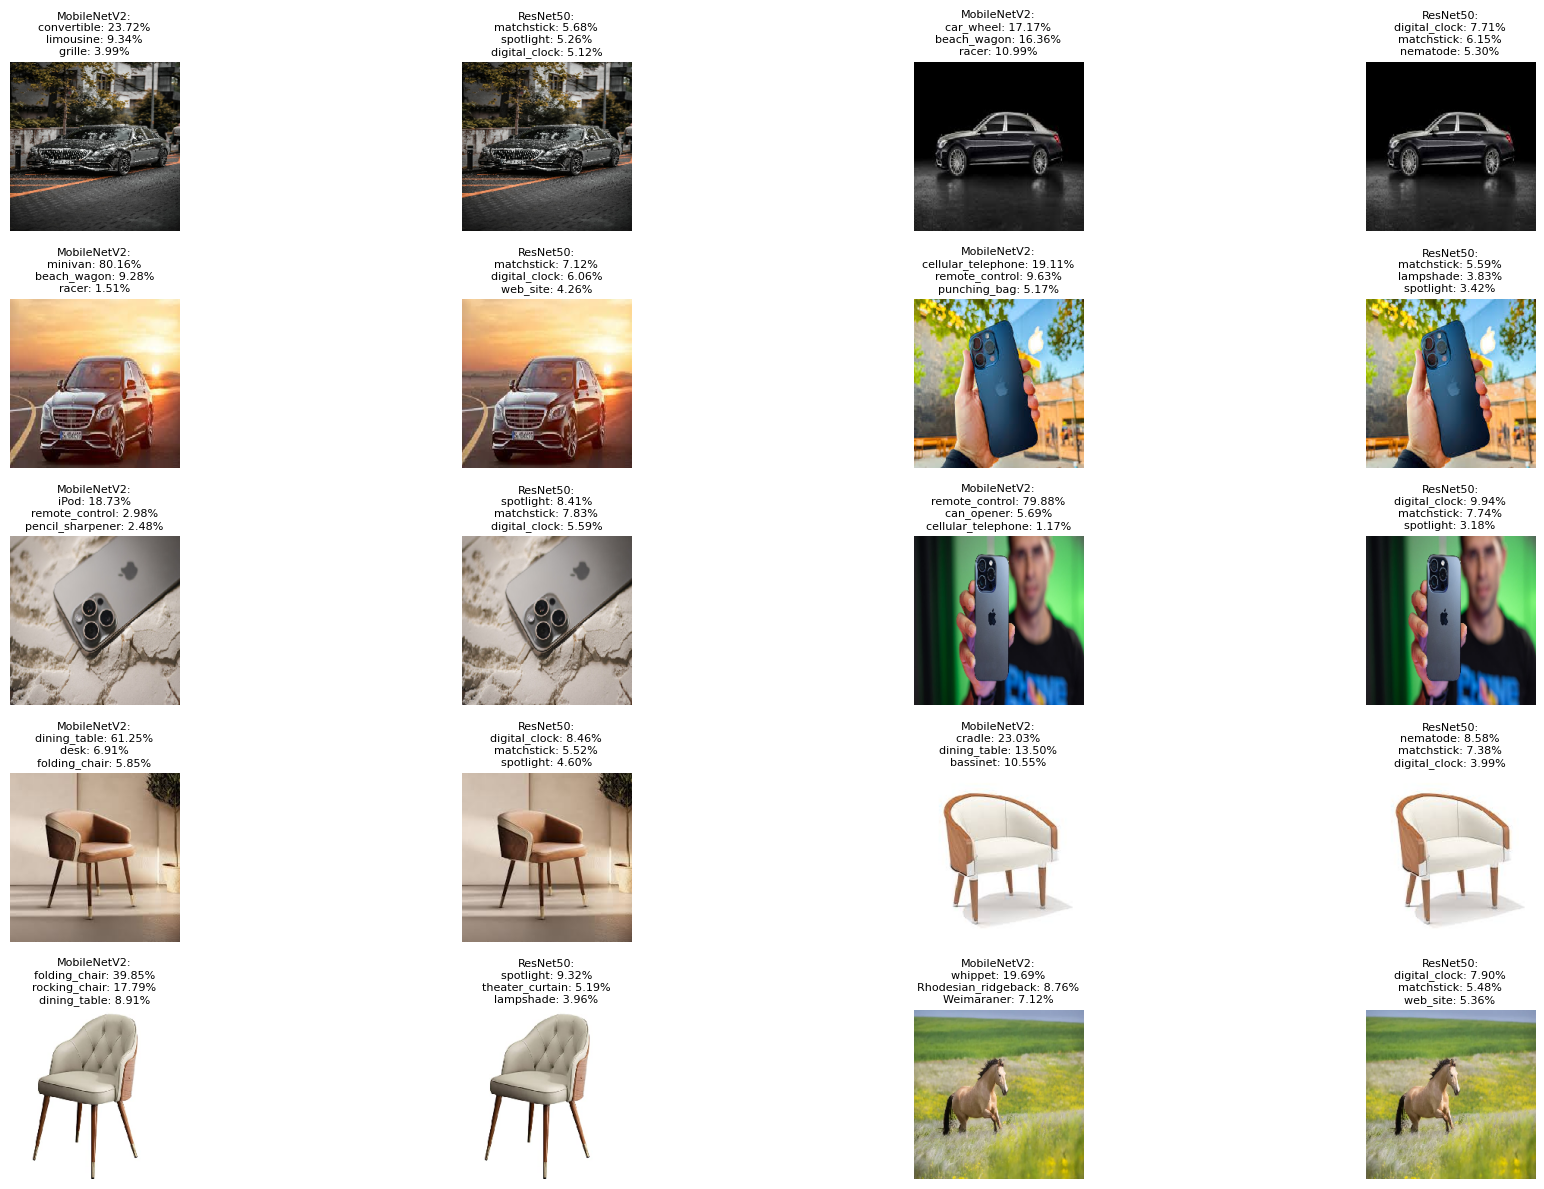

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
for i, img_path in enumerate(image_files[:10]):
    # Load and preprocess image
    img, img_array = load_and_prep_img(img_path)

    # Predict with both models
    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]

    preds2 = model2.predict(preprocess_resnet(img_array))
    decoded2 = decode_resnet(preds2, top=3)[0]

    # Display MobileNetV2 prediction
    plt.subplot(5, 4, 2*i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("MobileNetV2:\n" + "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded1]), fontsize=8)

    # Display ResNet50 prediction
    plt.subplot(5, 4, 2*i+2)
    plt.imshow(img)
    plt.axis("off")
    plt.title("ResNet50:\n" + "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded2]), fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
import gradio as gr
def prep_img(img, target_size=(224, 224)):
    img = img.resize(target_size)  # Resize the PIL image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

def predict_image(img):
    img, img_array = prep_img(img)

    # Predict using MobileNetV2
    preds1 = model1.predict(preprocess_mnv2(img_array))
    decoded1 = decode_mnv2(preds1, top=3)[0]
    mob_results = "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded1])

    # Predict using ResNet50
    preds2 = model2.predict((img_array))
    decoded2 = decode_resnet(preds2, top=3)[0]
    res_results = "\n".join([f"{label}: {prob:.2%}" for (_, label, prob) in decoded2])

    return f"🔍 MobileNetV2 Predictions:\n{mob_results}\n\n🧠 ResNet50 Predictions:\n{res_results}"

# Launch Gradio interface
gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Image Classifier with MobileNetV2 & ResNet50",
    description="Upload an image to see predictions from two different pretrained models."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a9e3d208d6fa21a257.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
